In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [14]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date",parse_dates = ['date'])

In [15]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [19]:
df = df[(df['value']>=df['value'].quantile(0.025))&(df['value']<=df['value'].quantile(0.975))]


,value
date,
2016-06-20,28508
2016-06-21,26805
2016-06-27,24278
2016-06-29,27734
2016-06-30,26696
...,...
2019-10-19,116900
2019-10-26,118564
2019-11-02,118347


In [18]:
df

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923
...,...
2019-11-03,130118
2019-11-09,115642
2019-11-10,117717


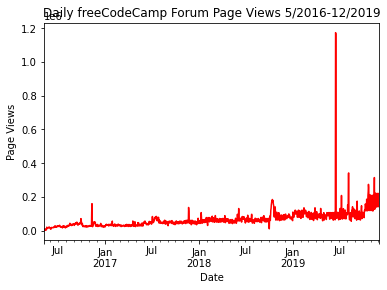

In [6]:
fig = df['value'].plot(title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019", color ='r', xlabel="Date",ylabel ="Page Views")

In [7]:
fig

<AxesSubplot:title={'center':'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

Text(0, 0.5, 'Page Views')

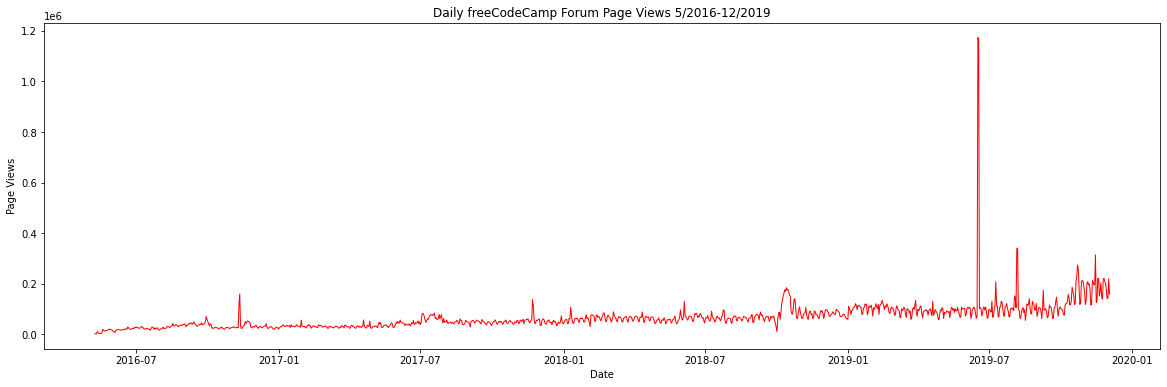

In [10]:
fig, ax = plt.subplots(figsize =(20,6))
    
ax.plot(df.index, df['value'], 'r', linewidth = 1)

ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

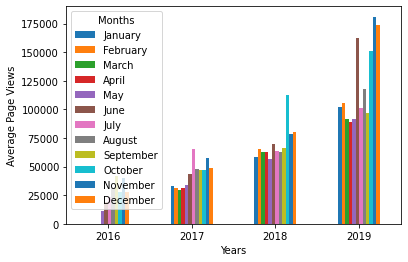

In [13]:
df_bar = df.copy(deep=True)


df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar = df_bar.groupby(["year","month"])['value'].mean().reset_index().sort_values(by=['year','month'])
df_bar = df_bar.set_index('year')
df_bar = df_bar.pivot_table(values = "value", index=df_bar.index, columns="month", aggfunc='first').reset_index()

df_bar = df_bar.set_index('year')
df_bar.columns = ['January','February','March','April','May','June','July','August','September','October','November','December']
df_bar= df_bar.fillna(0)


fig, ax = plt.subplots()

bar = df_bar.plot.bar(rot=0, ax=ax)
plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.legend(title='Months')